# DSCI 512 Lab 2

In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Instructions
rubric={mechanics:3}

Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

## Exercise 1: time complexity of recursive functions

For each of the following recursive functions, determine the time complexity as a function of the input $n$ and briefly justify your answer. 

#### 1.1
rubric={reasoning:3}

In [ ]:
def titled(n):
    if n >= 0:
        print('n: ', n)
        return titled(n-1)
    else:
        return "sandwich"

In [ ]:
titled(15)

#### 1.2
rubric={reasoning:3}

In [ ]:
def untitled(n):
    if n < 0:
        return "sandwich"
    else:
        print('n: ', n)
        return untitled(n-2)

In [ ]:
untitled(8)

#### 1.3
rubric={reasoning:3}

In [ ]:
def does_nothing(n):
    print('n:', n)
    if n == 0:
        return
    does_nothing(n-1)
    does_nothing(n-1)

In [ ]:
does_nothing(3)

#### 1.4
rubric={reasoning:3}

In [ ]:
def does_nothing_more_slowly(n):
    print(n)
    if n == 0:
        return
    does_nothing_more_slowly(n-1)
    does_nothing_more_slowly(n-1)
    does_nothing_more_slowly(n-1)

In [ ]:
does_nothing_more_slowly(3)

#### (optional) 1.5
rubric={reasoning:1}

In [ ]:
def looprec(n):
    print("Hello!")
    print('N: ', n)
    for i in range(n):
        looprec(n-1)

In [ ]:
looprec(3)

#### (optional) 1.6
rubric={reasoning:1}

In this exercise, determine the **space** complexity of `hello` in terms of $n$.

In [ ]:
def hello(n):
    if n == 0:
        return 1
    return hello(n-1) + hello(n-1)

In [ ]:
hello(4)

## Exercise 2: recursive sum
rubric={accuracy:3,quality:3}

Write a recursive function `rec_sum` that takes in a list and sums up the elements in the list. If the list is empty, it should return `None`. No loops, `sum`, or numpy operations allowed! And, as usual, a docstring is required.

In [3]:
# An empty list
assert rec_sum([]) is None

# A list with one element
assert rec_sum([32]) == 32

# A list with all positive numbers
assert rec_sum([1, 2, 3, 4, 5]) == 15

# A list with negative numbers
assert rec_sum([1, 2, 3, 4, -5]) == 5

# Add/append strings. The meaning of + in the context of strings is 'append'.
assert rec_sum(['I ', 'like ', 'recursion.']) == 'I like recursion.'

## (optional) Exercise 3: recursive graphics
rubric={accuracy:1,reasoning:1}

In this exercise you will use recursion to draw the Sierpinski triangle. An image of one such triangle is shown below.

<img width="600" height="600" src="sierpinski_6_smaller.png">

To help you do this, we are providing some code in the cell below. The `draw_triangle` function draws a triangle for you. When you are done calling `draw_triangle` as many times as you wish, call `show_triangles` once to render the image nicely. **You do not need to understand how the code below works. You only need to understand how to use it.** In other words, read the docstrings, but you don't need to read the code inside the functions.

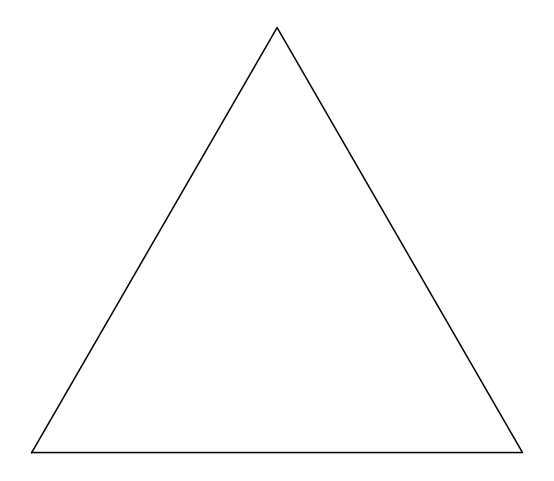

In [4]:
def draw_triangle(x, y, side):
    """
    Draw an equilateral triangle at (x,y) with side length `side`.

    Parameters:
    -----------
    x : float
        the x-coordinate of the *midpoint* of the triangle base
    y : float
        the y-coordinate of the *base* of the triangle
    side : float
        the length of each side of the triangle
    """
    height = np.sqrt(3)*side/2
    plt.plot([x-side/2.0, x+side/2.0, x, x-side/2.0], [y, y, y+height, y], 'k')


def show_triangles(save=False):
    """
    Make the Sierpinski triangle image look pretty.

    Parameters:
    -----------
    save : bool, optional
        Whether or not to save the image to a file (default: False).
    """
    plt.gcf().set_size_inches(10, 8.6)
    plt.axis('scaled')
    plt.axis('off')
    plt.tick_params(labelbottom=False, labelleft=False)
    if save:
        plt.tight_layout()
        plt.savefig('sierpinski.png')
    plt.show()

draw_triangle(0, 0, 1)  # example: a single triangle (depth=1)
show_triangles()        # show the triangle

Another example is given below: a Sierpinski triangle with depth 2, drawn without using recursion but just by calling `draw_triangles` 3 times. The point of this is that we provide you with (most of) the geometry, so you can focus on recursion and be less likely to get stuck on the geometry aspects.

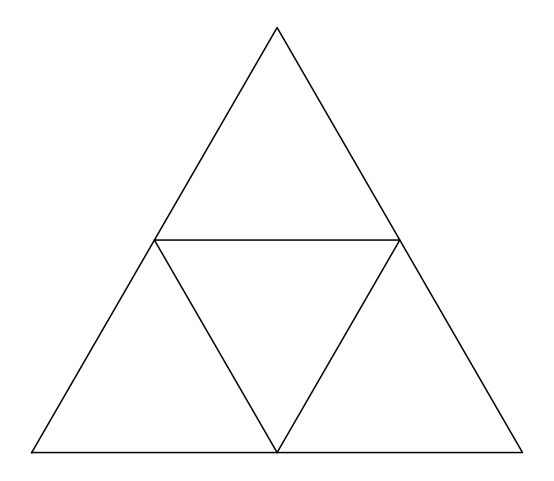

In [5]:
draw_triangle(-0.25, 0, 0.5)
draw_triangle(+0.25, 0, 0.5)
draw_triangle(0, (0.5*(np.sqrt(3)/2)), 0.5)
show_triangles()

Your tasks are as follows:

1. Write a recursive function `sierpinski` that takes four arguments: the coordinates `x` and `y`, the side length of the outermost triangle, `size`, and the depth `n`. Then, use your function to reproduce the figure above of the Sierpinski triangle with depth 7. Note: your code should only call `show_triangles` once, outside the recursive function (**not** within the recursive function)
2. Spend a few minutes contemplating how you would implement this without recursion. Once you have reached a sufficiently hopeless state of mind, record your thoughts here as part of your submission.
3. What is the big-O running time of your code, as a function of $n$?

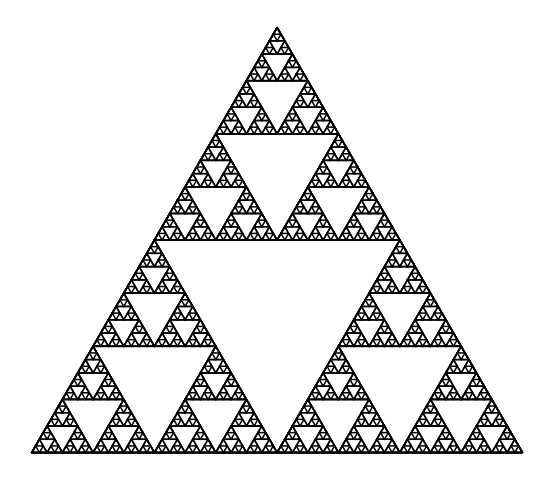

## (optional) Exercise 4: tricky recursive code
rubric={reasoning:1}

Explain what the following code does, and how it works:

In [8]:
def f(letters, n):
    """
    Does something mysterious.

    Parameters
    ----------
    letters : str 
        ?????
    n : int 
        ?????

    Returns
    -------
    ??? 
        ?????   

    """

    if n == 0:
        return [""]

    return [letter + l for letter in letters for l in f(letters, n-1)]

In [ ]:
f("MDS!", 1)

## Exercise 5: Set implementation with BSTs

In this exercise, you will implement a set data structure based on a binary search tree. You will write the tree as a Python class. We are providing some starter code for you below. 

#### 5(a)
rubric={accuracy:4,quality:4}

Implement the `insert` and `contains` functions in the `TreeSet` class:

1. Write a recursive function `insert` that takes your tree and a new element, and inserts it into the tree. Your function should work be recursively calling `insert` on the left or right subtree depending on whether the new value is greater than or less than the root value. If the element is already in the tree, then the call to `insert` should do nothing. 
2. Write a recursive function `contains` that takes your tree and a query, and checks whether that element is present in the tree. If present, it should return `True` and otherwise `False`. Your function should work by recursively calling `contains` on the left or right subtree, depending on whether the query value is greater than or less than the root value.

In [10]:
class TreeSet:
    """
    A set implementation based on a binary tree.
    """

    def __init__(self):
        self.value = None
        self.left = None
        self.right = None

    
    
    def __str__(self, s=""):
        """
        A crude way to print the tree. A better way would be to print the tree by depth. 

        Note: __str__ is a special method, like __init__, that returns a string representation of an object.

        Parameters
        ----------
        s : str
           the starting string value. Default is empty string

        Returns
        -------
        str 
            aggregated items in the set

        Example
        --------
        >>> my_set = TreeSet() 
        >>> my_set.insert("Try")
        >>> my_set.insert("your")
        >>> my_set.insert("best")
        >>> print(my_set)
        Try, your, best,
        """

        if self.value is None:
            return "(An empty tree)"

        s += self.value + ", "

        if self.right is not None:
            s += self.right.__str__()

        if self.left is not None:
            s += self.left.__str__()

        return s

In [11]:
my_set = TreeSet()
my_set.insert("today")
my_set.insert("hello")
my_set.insert("data science")
my_set.insert("jerry")
my_set.insert("apple")
my_set.insert("17")
my_set.insert("hello")
print(my_set)

today, hello, jerry, data science, apple, 17, 


In [12]:
assert my_set.contains("data science")
assert my_set.contains("apple")
assert not my_set.contains("18")
assert not my_set.contains("blah")

#### 5(b)
rubric={accuracy:3}

In lecture 2, we empirically timed the searching operation using four approaches:

1. Linear search on an unsorted list
2. Binary search on an sorted list
3. Python's `in` operator on an uns orted list
4. `in` with Python's built-in `set`

The code from lecture, for just Python's `set`, is reproduced below for your convenience:

In [13]:
list_sizes = [100, 1000, 10_000, 100_000, 1_000_000]

results = defaultdict(list)
results["size"] = list_sizes

key = -1

for list_size in list_sizes:
    print('List size: ', list_size)
    x = np.random.randint(1e8, size=list_size)

    x_set = set(x)
    time = %timeit -q -o -r 1 (key in x_set)
    results["Python set in"].append(time.average)

List size:  100
List size:  1000
List size:  10000
List size:  100000
List size:  1000000


In [14]:
df = pd.DataFrame(results, columns=list(results.keys()))
df

,size,Python set in
0,100,5.764879e-08
1,1000,6.288451e-08
2,10000,6.399038e-08
3,100000,5.807562e-08
4,1000000,6.491792e-08


Empirically measure the speed of `contains` with your `TreeSet` implementation, and then add them to the DataFrame for printing. Print out the DataFrame.

(Note: for reasons of speed, we only go up to $n=10^6$ here. Populating the `TreeSet` objects with $10^7$ items would take a long time.

In [ ]:
df = pd.DataFrame(results, columns=list(results.keys()))
df

#### 5(c)
rubric={reasoning:5}

Discuss your results from the previous part. How do Python's `set` and your `TreeSet` compare? Specifically:

- Which method is faster?
- What is the theoretical time complexity of `in` with a `set`, and `contains` with a `TreeSet`?
- Are the empirical results consistent with the theoretical time complexities?
- Are the results what you expected, overall?

#### (optional) 5(d)
rubric={reasoning:1}

Now, also time the `insert` function from `TreeSet` and compare it to the speed of `add` from Python's `set`. This time, $n$ is **not** the number of elements we are inserting. Rather, you are measuring the speed of inserting _one_ value into the set, and $n$ is the current size of the set before insertion. 

Note: you'll have to be a bit careful setting this up. If you repeatedly insert the same value into the set, is the experiment valid?

Discuss the results.